In [19]:
import pandas as pd
import os
import pandas as ps
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd
import kaggle

def get_preprocessed_data():
    """
    Fetch, load, and preprocess the dataset.
    Returns a pandas DataFrame.
    """
    try:
        # Download the dataset using the Kaggle API
        kaggle.api.dataset_download_files("dubradave/hospital-readmissions", path=".", unzip=True)

        # Load the dataset into a pandas DataFrame
        df = pd.read_csv("hospital_readmissions.csv")

        #Converting categorical values to numerical
        #Coverting readmitted column to identifiers 1/0
        df["readmitted"] = df["readmitted"].map({"yes":1, "no" : 0})
        df["diabetes_med"] = df["diabetes_med"].map({"yes": 1, "no": 0})
        df.head()

        return df  # Return the processed DataFrame

    except Exception as e:
            print(f"Error occurred while fetching data: {e}")
            return None

In [21]:
df = get_preprocessed_data()

if df is not None:
    print("Dataset Preview:")
    print(df.head(5)) # Preview the first few rows
    print("Dataset Shape:", df.shape)  # Get the number of rows and columns
else:
    print("Failed to load the dataset.")

Dataset URL: https://www.kaggle.com/datasets/dubradave/hospital-readmissions
Dataset Preview:
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  Internal

In [22]:
numeric_df = df.select_dtypes(include= ["int64", "float64"])
binary_df = df.select_dtypes(include = ["object"])

In [23]:
# Scaling the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_df = df.select_dtypes(include= ["int64", "float64"])
numerical_df = scaler.fit_transform(numerical_df)

# EDA

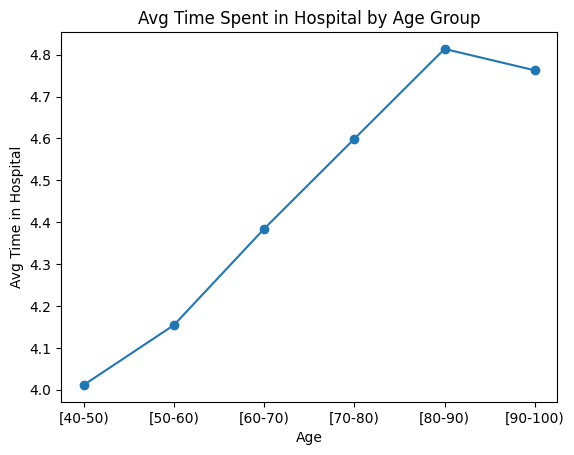

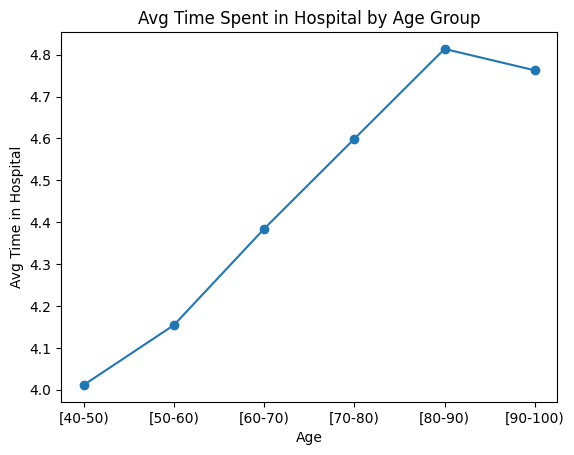

In [24]:

def line_plt(df):
    age_hospitals = df.groupby("age")["time_in_hospital"].mean()
    fig, ax = plt.subplots()
    ax.plot(age_hospitals.index, age_hospitals.values, marker="o")
    ax.set_xlabel("Age")
    ax.set_ylabel("Avg Time in Hospital")
    ax.set_title("Avg Time Spent in Hospital by Age Group")
    return fig  # Return the figure

line_plt(df)


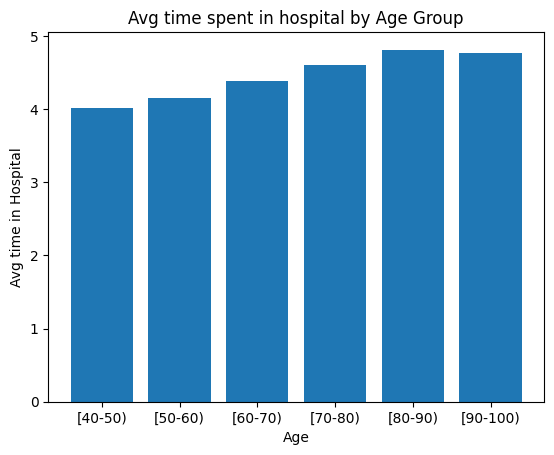

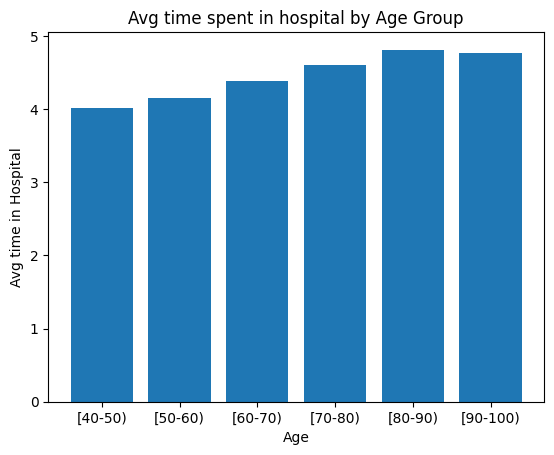

In [28]:

def barplot(df):
    age_hospitals = df.groupby("age")["time_in_hospital"].mean()
    fig, ax = plt.subplots()
    ax.bar(age_hospitals.index, age_hospitals.values)
    ax.set_xlabel("Age")
    ax.set_ylabel("Avg time in Hospital")
    ax.set_title("Avg time spent in hospital by Age Group")
    return fig

barplot(df)

Time in hospital increments as age group increases. The older you get the more time you spend in hospital; however, after 80-90 age the readmission declines.

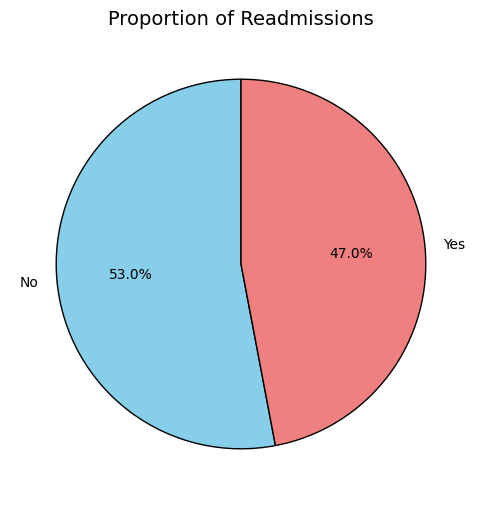

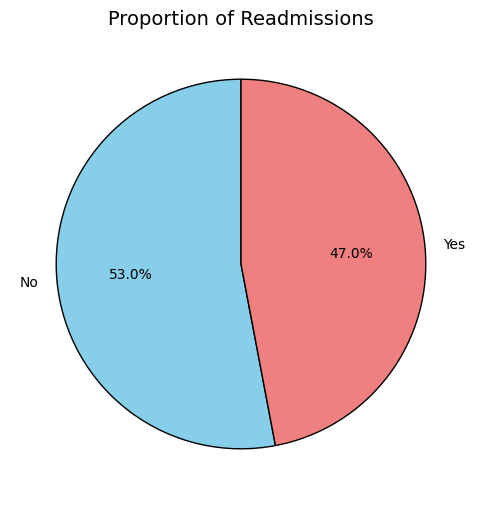

In [31]:
def pie_plot(df):
    # Calculate readmission proportions
    readmission_counts = df['readmitted'].value_counts()

    # Create the pie chart
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pie(
        readmission_counts,
        autopct='%1.1f%%',
        startangle=90,
        labels=["No", "Yes"],
        colors=["skyblue", "lightcoral"],
        wedgeprops={"edgecolor": "black"}
    )
    ax.set_title("Proportion of Readmissions", fontsize=14)
    return fig  # Return the figure object

pie_plot(df)


In [9]:
print(df.columns)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [ ]:
#Using Label Encoder to convert  categorical data into numerical
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include="object").columns:
        le = LabelEncoder()

        df[col] = le.fit_transform(df[col])
        print(f"{col}:{df[col].unique()}")  


age:[3 1 2 0 4 5]
medical_specialty:[4 5 3 2 0 6 1]
diag_1:[0 6 3 2 7 1 5 4]
diag_2:[7 6 0 3 1 2 5 4]
diag_3:[6 0 1 7 3 5 2 4]
glucose_test:[1 2 0]
A1Ctest:[1 2 0]
change:[0 1]


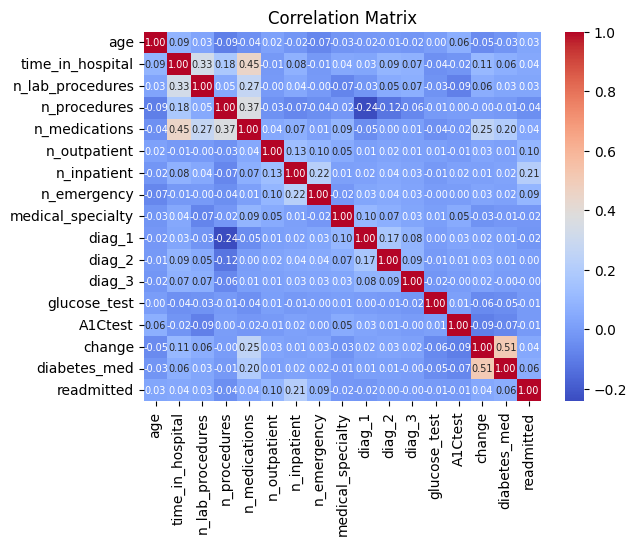

In [ ]:
def correlation_matrix(df):
    # Compute the correlation matrix
    corr_matrix = df.corr()
    
    # Plot the heatmap
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                annot_kws={"size": 7})
    plt.title("Correlation Matrix")
    plt.show()
    
    # Return the correlation matrix
    return corr_matrix

# Call the function and capture the correlation matrix
corr_matrix = correlation_matrix(df)

In [12]:
threshold = 0.1

# Selecting highly correlated features
readmitted_features = corr_matrix["readmitted"].abs()
significant_corr = readmitted_features[readmitted_features >= threshold]

print(significant_corr.sort_values(ascending= False))

readmitted     1.00000
n_inpatient    0.21248
Name: readmitted, dtype: float64


In [13]:
# Removing Outliers using IQR method

def remove_outliers(df, cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return df
# specify particular columns to remove outliers
cols_to_check = ['n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

df_cleaned = remove_outliers(df, cols_to_check)


# Train/Test Split for X,Y variables that can be used for multiple models 

In [14]:
from sklearn.model_selection import train_test_split
selected_features = ["n_inpatient", "n_outpatient", "n_emergency", "time_in_hospital"]
X = df_cleaned[selected_features]
Y = df_cleaned["readmitted"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression

Training Accuracy: 0.6026
Test Accuracy: 0.6116

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      2658
           1       0.65      0.38      0.48      2342

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.58      5000
weighted avg       0.62      0.61      0.59      5000


Confusion Matrix:


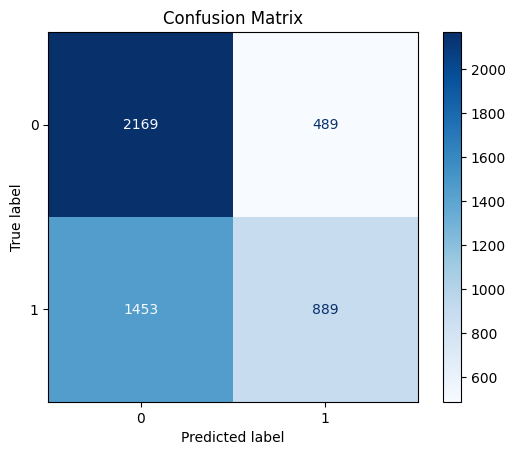

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def logistic_regression():
    # selected_features = ["n_inpatient", "n_outpatient", "n_emergency", "time_in_hospital"]
    # X = df_cleaned[selected_features]
    # Y = df_cleaned["readmitted"]

    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    model = LogisticRegression()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    train_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
    cm  = confusion_matrix(Y_test, Y_pred) # Confusion Matrix
    report = classification_report(Y_test, Y_pred)
    print("Training Accuracy:",train_accuracy)
    print("Test Accuracy:", test_accuracy)

    #Classification Report
    Y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(report)

    print("\nConfusion Matrix:")
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = "Blues")
    plt.title("Confusion Matrix")
    plt.show()

    return model, train_accuracy, test_accuracy, cm, report

# Call the function and capture the model, train and test accuracy
model, train_accuracy, test_accuracy, cm, report  = logistic_regression()


# Decision Tree Model

Training Accuracy: 0.6117
Test Accuracy: 0.6034

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2658
           1       0.59      0.49      0.54      2342

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



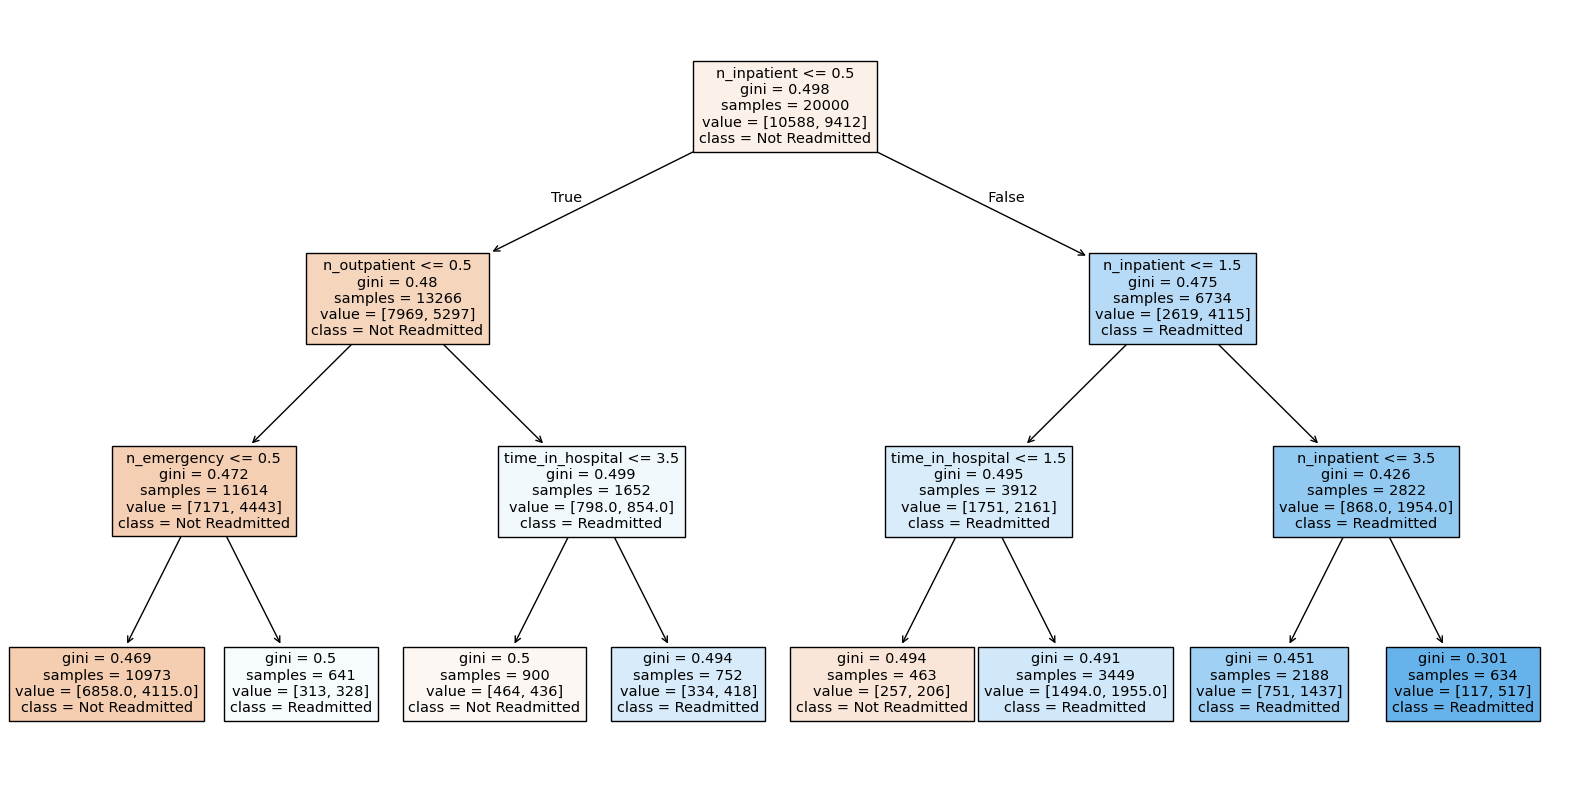

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def decision_tree(max_depth=3, criterion="gini"):
    dt_model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    dt_model.fit(X_train, Y_train)

    train_accuracy = dt_model.score(X_train, Y_train)
    test_accuracy = dt_model.score(X_test, Y_test)

    Y_pred = dt_model.predict(X_test)

    report = classification_report(Y_test, Y_pred, output_dict=True)

    return dt_model, train_accuracy, test_accuracy, report


# Random Forest Model

In [34]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def random_forest_model():
    rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 5)
    rf_model.fit(X_train, Y_train)


    #Evaluating the model
    Y_pred = rf_model.predict(X_test)

    train_accuracy = float(rf_model.score(X_train, Y_train))
    test_accuracy = float(rf_model.score(X_test, Y_test))

    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    #classification_report
    print("\nClassification Report")
    report = classification_report(Y_test, Y_pred)
    print(report)


    return rf_model, train_accuracy, test_accuracy, report

# Call the function and capture the model, train and test accuracy

rf_model,report, train_accuracy, test_accuracy = random_forest_model()



Training Accuracy: 0.6148
Test Accuracy: 0.6096

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      2658
           1       0.60      0.51      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.61      5000



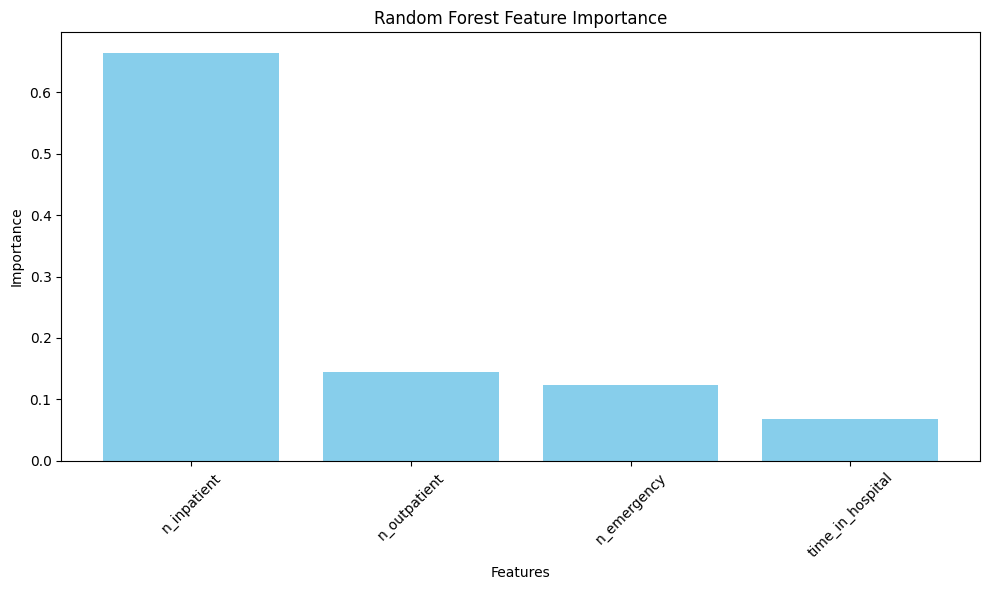

            Feature  Importance
0       n_inpatient    0.664408
1      n_outpatient    0.143755
2       n_emergency    0.123948
3  time_in_hospital    0.067888


In [ ]:
#Important featres

def plot_feature_importance(model, feature_names, title="Feature Importance"):
    """
    Plot the feature importance from a trained Random Forest model.

    Parameters:
    - model: Trained model with `feature_importances_` attribute (e.g., RandomForestClassifier).
    - feature_names: List or array of feature names corresponding to the input data.
    - title: Title for the plot (default: "Feature Importance").

    Returns:
    - feature_importance: DataFrame of features and their importance scores.
    """
    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": model.feature_importances_  # Use the model parameter
    }).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return feature_importance


# Assuming rf_model is trained and X.columns contains feature names
feature_importance_df = plot_feature_importance(rf_model, X.columns, title="Random Forest Feature Importance")

# Print the DataFrame
print(feature_importance_df)


